In [2]:
from netCDF4 import Dataset

In [3]:
rootgrp = Dataset("tds_data.nc", "r", format="NETCDF4")

print(rootgrp)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Name: MERRByS L1b DDM File
    date_created: 2017-11-14T20:48:38
    data_use_license: Creative Commons License: TDS-1 GNSS-R Dataset. Surrey Satellite Technology Ltd. Creative Commons Attribution-NonCommercial 4.0 International License - http://creativecommons.org/licenses/by-nc/4.0/
    FileIDCode: 2015-04/01/H00
    dimensions(sizes): 
    variables(dimensions): 
    groups: 000000, 000001, 000002, 000003, 000004, 000005, 000006, 000007, 000008, 000009, 000010, 000011, 000012, 000013, 000014, 000015, 000016, 000017, 000018, 000019, 000020, 000021, 000022, 000023, 000024, 000025, 000026, 000027, 000028, 000029, 000030, 000031, 000032, 000033, 000034, 000035, 000036, 000037, 000038, 000039, 000040, 000041, 000042, 000043, 000044, 000045, 000046, 000047, 000048, 000049, 000050, 000051, 000052, 000053, 000054, 000055, 000056, 000057, 000058, 000059, 000060, 000061, 000062, 000063, 000064, 000065, 0

In [10]:
def walktree(top):
    values = top.groups.values()
    yield values
    for value in top.groups.values():
        for children in walktree(value):
            yield children
            
for element in walktree(rootgrp):
    print(element)

odict_values([<class 'netCDF4._netCDF4.Group'>
group /000000:
    dimensions(sizes): Delay(128), Doppler(20), DateTimeTrack(672)
    variables(dimensions): float64 Delay(Delay), float64 Doppler(Doppler), float64 IntegrationMidPointTime(DateTimeTrack), uint16 DDM(DateTimeTrack,Doppler,Delay)
    groups: 
, <class 'netCDF4._netCDF4.Group'>
group /000001:
    dimensions(sizes): Delay(128), Doppler(20), DateTimeTrack(1040)
    variables(dimensions): float64 Delay(Delay), float64 Doppler(Doppler), float64 IntegrationMidPointTime(DateTimeTrack), uint16 DDM(DateTimeTrack,Doppler,Delay)
    groups: 
, <class 'netCDF4._netCDF4.Group'>
group /000002:
    dimensions(sizes): Delay(128), Doppler(20), DateTimeTrack(1210)
    variables(dimensions): float64 Delay(Delay), float64 Doppler(Doppler), float64 IntegrationMidPointTime(DateTimeTrack), uint16 DDM(DateTimeTrack,Doppler,Delay)
    groups: 
, <class 'netCDF4._netCDF4.Group'>
group /000003:
    dimensions(sizes): Delay(128), Doppler(20), DateTimeT

In [46]:
print(rootgrp.groups['000001'].variables['DDM'])

<class 'netCDF4._netCDF4.Variable'>
uint16 DDM(DateTimeTrack, Doppler, Delay)
    Name: DDM
path = /000001
unlimited dimensions: DateTimeTrack, Doppler, Delay
current shape = (1040, 20, 128)
filling on, default _FillValue of 65535 used



In [45]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

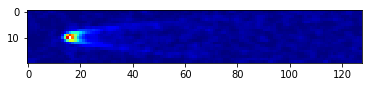

In [56]:
fig = plt.figure()

ddm = rootgrp.groups['000003'].variables['DDM'][0]
im = plt.imshow(ddm, cmap='jet', animated=True)

def animate(i):
    ddm = rootgrp.groups['000005'].variables['DDM'][i+200]
    im.set_array(ddm)
    return im
# total number of frames = 85146
ani = animation.FuncAnimation(fig, animate, frames=100, interval=100)
HTML(ani.to_html5_video())